# Introduction to Data Science - Homework 2

Due: Monday, May 3 2020, 11:59pm.

In this homework you will scrape (a) a wikipedia page and (b) github repositories and organize the information in a Pandas dataframe. 

## Your Data
First Name: ELIOR
<br>
Last Name: COHEN
<br>
E-mail: eliorcc@gmail.com
<br>
UID: 211899091
<br>

In [1]:
# imports and setup 
from bs4 import BeautifulSoup
# you can use either of these libraries to get html from a website
import time
import os
import urllib3

import pandas as pd
import scipy as sc
import numpy as np

import statsmodels.formula.api as sm

import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6) 

# where the data is stored
DATA_PATH = "data"


#urllib to load webpage
urllib3.disable_warnings() #to turnoff ssl warnings.
http = urllib3.PoolManager()


### 0. Wikipedia scraping
Write a script that crawls a random wikipedia using this url: https://en.wikipedia.org/wiki/Special:Random (https://en.wikipedia.org/wiki/Special:Random). Once the page is downloaded it prints the name of the wikipedia entry, the date when it was last modified and the categories the page belongs to. If no categories are available it prints a message of "no categories available".

In [5]:
#load the random wikipedia page
response = http.request('GET', 'https://en.wikipedia.org/wiki/Special:Random')
page_data  = response.data

soup = BeautifulSoup(page_data, 'html.parser')

#parsing the data with BS$

name_of_entry = soup.h1.text
categories = []
for category in soup.select('div[id="mw-normal-catlinks"] li a'):
    categories.append(category.text)

categories = ' | '.join(categories)
if not categories:
    categories = 'no categories available'
    
last_mod = soup.select('li[id="footer-info-lastmod"]')
if last_mod:
    last_modified_date = last_mod[0].text.strip().replace('\xa0','')
else:
    last_modified_date = ''
    
    
print('Name of article: ',name_of_entry,end='\n\n')
print('Categories: ', categories,end='\n\n')
print(last_modified_date)

Name of article:  Zosteromeigenia

Categories:  Tachinidae genera | Monotypic Brachycera genera | Diptera of Australasia | Taxa named by Charles Henry Tyler Townsend | Insects described in 1919

This page was last edited on 18 July 2019, at 11:38(UTC).


### 1. Scrape Github Repository List using BeautifulSoup
In this part you will explore Github repositories, specifically the 100 most-starred repositories. You are going to scrape data from [this repository list](https://github.com/search?o=desc&q=stars%3A%3E1&s=stars&type=Repositories).

### 1.1. Check whether you are permitted to scrape the data
Before you start to scrape any website you should go through the terms and services or similar pages of the website. Almost all websites post conditions to use their data. Check the terms of [https://github.com/](https://github.com/) to see whether the site permits you to scrape their data or not. Are you sure you are allowed to scrape?

**Your solution:**


Scraping github is allowed for reasearch and learning purpose as long as the projects are opensource.

Source: https://github.com/github/site-policy/issues/56

### Task 1.2 Load the Data

To avoid any problems with GitHub blocking us from downloading the data many times, we have downloaded and saved all the html files in the [data](data) folder (you can find it in Lecture 5 moodle section - the file is named data.zip, copy it to your folder where the notebook is, and extract it there). You will be treating the data folder as your website to be scraped. The path to data folder is stored in `DATA_PATH` variable.

In the data folder you will find first 10 pages of highly starred repositories saved as `searchPage1.html`,`searchPage2.html`,`searchPage3.html` ... `searchPage10.html`

Now read these html files in python and create a soup object. This is a two step process:
 * Read the text in the html files
 * Create the soup from the files that you've read. 
 
We recommend that you create a single soup using BeautifulSoups' [append()](https://www.crummy.com/software/BeautifulSoup/bs4/doc/#append) function.

In [6]:
 soup = BeautifulSoup('','html.parser')

In [7]:
## Your code goes here
html_files = [file for file in os.listdir(DATA_PATH) if '.html' in file]
for file in html_files:
    with open(os.path.join(DATA_PATH,file),'r') as f:
        html_data = f.read()
    curr_soup = BeautifulSoup(html_data, 'html.parser')
    soup.append(curr_soup)
    

    

repo_paths= [anchor['href'] for anchor in soup.select('li.repo-list-item h3 a')]
print(len(repo_paths), 'repos found')
    

100 repos found


### 1.3. Extract Data

Extract the following data for each repository, and create a Pandas Dataframe with a row for each repository and a column for each of these datums. 

1. Name of the repository
+ Number of contributors 
+ Programming language used 
+ Number of stars 
+ Number of issues
+ Number of forks
+ Length of readme file.

Note that you will first have to extract links from the soup that you just scraped earlier. When you extract the link for the repository it will be a path to the stored html page for the repository. You will use this path to read the file and extract the above information.

Refer to the scraping lecture for details on how to do this. We recommend you use the web inspector to identify the relevant structures. 

Save the dataframe you created to a new file `project_info.csv` and ***include this in your submission***. You will loose points if you don't.

In [8]:
## parsing the repo main html files from the links obtained above
df = pd.DataFrame({
    'repository':[],
    'contributors':[],
    'Programming_language':[],
    'stars':[],
    'issues':[],
    'forks':[],
    'readme_len':[],
})

count = 0
for repo_path in repo_paths:
    with open(repo_path,'r') as f:
        html_data = f.read()
        soup = BeautifulSoup(html_data, 'html.parser')
        repo_name = soup.select('h1 strong[itemprop="name"]')[0].text
#         print(repo_name)
        contributors = soup.select('a:contains("contributors")')[0].text.replace("contributors","").strip().replace(',','')
        programming_lang = soup.select('span[class="lang"]')
        if programming_lang:
            programming_lang = programming_lang[0].text
        else:
            programming_lang = ''
        stars = soup.select('li:contains("Star")')[0].text.replace("Star","").strip().replace(',','')
        issues = soup.select('a:contains("Issues")')
        if issues:
            issues = issues[0].text.replace("Issues","").strip().replace(',','')
        else:
            issues = 0
        fork = soup.select('li:contains("Fork")')[0].text.replace("Fork","").strip().replace(',','')
        length_readme = len(soup.select('div[id="readme"]')[0].text)
        
        df.loc[count] = [repo_name,contributors,programming_lang,stars,issues,fork,length_readme]
        count+=1
        
print(df.head())
print('Saving the dataframe to csv')
df.to_csv('project_info.csv',index=False)

     repository contributors Programming_language  stars issues  forks  \
0  react-router          542           JavaScript  34781     38   7200   
1          yarn          478           JavaScript  34772   1616   2077   
2       next.js          625           JavaScript  34716    212   3882   
3    impress.js           60           JavaScript  34489     40   6793   
4         redis          292                    C  34254   1383  13102   

   readme_len  
0       881.0  
1      1921.0  
2     57501.0  
3      5794.0  
4     19298.0  
Saving the dataframe to csv


### 2. Analyzing the repository data

In this part, you will analyze the data collectd. The goal is to identify properties that make a repository popular. 

First, load the `project_info.csv` file in again. **We need you to do this so that we can run your code below without having to run your scraping code, which can be slow.**

In [9]:
# Read your csv here
df = pd.read_csv('project_info.csv')


### 2.1. Reformat the data into useful datatypes

1. Print the data types for the columns of your dataframe
+ Reformat the colums Issues, Forks, Stars, and Contributers to be integer data
+ There is one repository flagged as having infinite contributers (the Linux kernel). We'll assume that it in fact has 15000 contributors (about twice as much as the next project). 

In [10]:
#1
print('Dtype before')
print(df.dtypes)

#2,3
# df.replace('')
#fixing the infinite symbol in contributors for linux. Replaching it by 15000
df = df.replace('∞',15000)
df = df.astype({'contributors':int,'stars':int,'issues':int,'forks':int,'readme_len':int})



print('\n\n','Dtype After')

print(df.dtypes)

Dtype before
repository               object
contributors             object
Programming_language     object
stars                     int64
issues                    int64
forks                     int64
readme_len              float64
dtype: object


 Dtype After
repository              object
contributors             int64
Programming_language    object
stars                    int64
issues                   int64
forks                    int64
readme_len               int64
dtype: object


### Task 2.2 Describe the data

+ Get an overview of the data using the describe function.
+ Compute the correlation matrix, visualize it with a heat map.
+ Visualize the correlations by making a scatterplot matrix.
+ Interprete what you see.

You can re-use code from your previous homework here.

In [11]:
# your code goes here
df.describe()

,contributors,stars,issues,forks,readme_len
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,781.860000,53273.770000,757.530000,12091.810000,13534.020000
std,1633.637257,33218.146273,1221.937065,10648.688346,24186.722523
min,2.000000,32952.000000,0.000000,919.000000,466.000000
25%,139.000000,35509.500000,40.000000,5994.250000,2147.000000
50%,390.500000,44438.500000,294.500000,9273.000000,4128.500000
75%,826.250000,55545.750000,654.500000,15073.500000,11774.750000
max,15000.000000,297367.000000,4928.000000,72013.000000,158623.000000


In [12]:
df.corr()

,contributors,stars,issues,forks,readme_len
contributors,1.000000,0.201100,0.132525,0.255113,-0.067756
stars,0.201100,1.000000,-0.061251,0.520185,-0.041444
issues,0.132525,-0.061251,1.000000,-0.036944,-0.146726
forks,0.255113,0.520185,-0.036944,1.000000,-0.112396
readme_len,-0.067756,-0.041444,-0.146726,-0.112396,1.000000


In [13]:
#heatmap of correlation
df.corr().style.background_gradient(cmap='coolwarm').set_precision(2)


,contributors,stars,issues,forks,readme_len
contributors,1.00,0.20,0.13,0.26,-0.07
stars,0.20,1.00,-0.06,0.52,-0.04
issues,0.13,-0.06,1.00,-0.04,-0.15
forks,0.26,0.52,-0.04,1.00,-0.11
readme_len,-0.07,-0.04,-0.15,-0.11,1.00


/home/ali/.local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/ali/.local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/ali/.local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/home/ali/.local/lib/python3.7/site-packages/pandas/plottin

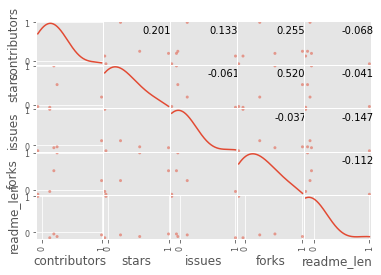

In [21]:
#scatter plot

corr = df.corr()
axes = pd.plotting.scatter_matrix(corr,alpha=0.5,diagonal='kde');
corr = df.corr().values
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
plt.show()

**Your Interpretation:** TODO

We see positive correlation between contribution, stars and forks

Explanation: projects with more contributors receive more stars and forks which makes sense

issues has weak positive correlation with contributors and negative correlation with other columns
Explanation: since there are more contributors the issues are solved quickly. So we have fewer issues in famous project. This explains the negative and weak positive correlation
